In [ ]:
from python_utils import converters
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


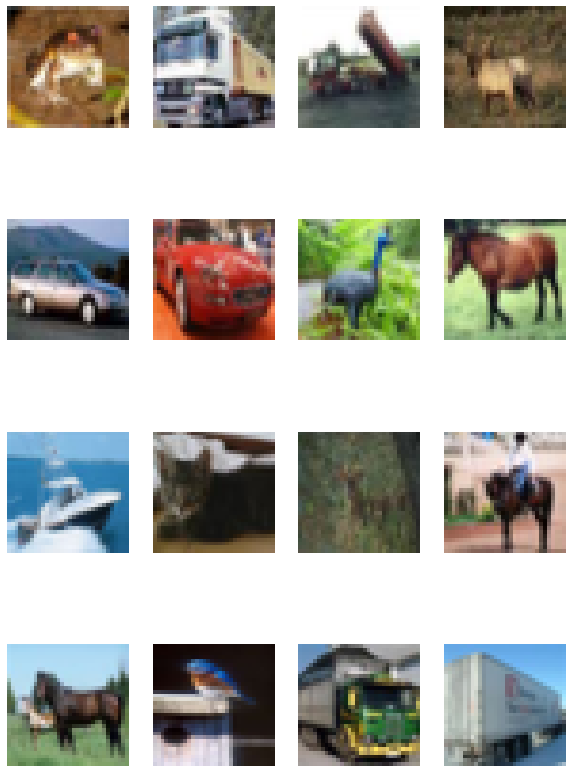

In [ ]:
fig, axs=plt.subplots(4,4,figsize=(10,15))


for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.plot()
    

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
n_classes=10
Y_train=to_categorical(y_train,n_classes)
Y_test=to_categorical(y_test,n_classes)

In [15]:
from keras.models import Sequential 
from keras.layers.convolutional import Conv2D
from keras.layers import Dense,MaxPool2D, Dropout,Flatten
from keras import losses 
model= Sequential()

#convolutional layer 
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(50,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(34,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.11))


#concatination layer 
model.add(Flatten())

#hidden layers
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.45))

#output layer
model.add(Dense(10,activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#model fitting
model.fit(x_train,Y_train,batch_size=128,epochs=10,validation_data=(x_test,Y_test))


Epoch 1/10
391/391 [==============================] - 201s 511ms/step - loss: 1.9825 - accuracy: 0.2508 - val_loss: 1.4052 - val_accuracy: 0.5005
Epoch 2/10
391/391 [==============================] - 199s 510ms/step - loss: 1.4404 - accuracy: 0.4730 - val_loss: 1.2187 - val_accuracy: 0.5639
Epoch 3/10
391/391 [==============================] - 201s 514ms/step - loss: 1.2841 - accuracy: 0.5375 - val_loss: 1.1755 - val_accuracy: 0.5813
Epoch 4/10
391/391 [==============================] - 202s 517ms/step - loss: 1.1629 - accuracy: 0.5823 - val_loss: 1.0269 - val_accuracy: 0.6408
Epoch 5/10
391/391 [==============================] - 202s 517ms/step - loss: 1.0956 - accuracy: 0.6108 - val_loss: 0.9793 - val_accuracy: 0.6609
Epoch 6/10
391/391 [==============================] - 202s 517ms/step - loss: 1.0274 - accuracy: 0.6365 - val_loss: 0.9312 - val_accuracy: 0.6745
Epoch 7/10
391/391 [==============================] - 202s 516ms/step - loss: 0.9694 - accuracy: 0.6547 - val_loss: 0.9145 -

In [16]:
#working of dense layer
import numpy as mp
#values in the matrices are taken arbitarily
input_shape=[[2,3],[3,4]]
kernel_size=[[4,3],[4,5]]
print(mp.dot(input_shape,kernel_size))

[[20 21]
 [28 29]]


In [17]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 11s 36ms/step - loss: 0.8185 - accuracy: 0.7133


[0.8184660077095032, 0.7132999897003174]

PREDICTION

In [26]:
import numpy as np

classes=range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = x_test[1209:1218]
labels = np.argmax(Y_test[1209:1218],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 24ms/step


In [27]:
print(predictions)

[[4.2014397e-04 1.5257292e-06 3.4455337e-02 3.4465950e-03 5.0411776e-02
  2.5306411e-02 1.1442478e-05 8.8590163e-01 4.7500248e-06 4.0292511e-05]
 [5.9424967e-01 9.2316968e-03 3.1181786e-02 7.2741114e-02 1.1748204e-01
  2.7381351e-02 1.8662480e-03 4.8954234e-02 5.6810707e-02 4.0101163e-02]
 [4.8273569e-04 1.4857209e-04 1.9707425e-02 2.2155235e-02 3.3347603e-02
  7.6838990e-04 9.2281044e-01 1.1814975e-04 7.5798060e-05 3.8571961e-04]
 [1.6371593e-02 6.3953894e-01 1.3645753e-03 9.9790776e-03 1.6643790e-03
  6.4757392e-03 1.6719063e-03 4.8640380e-03 1.5036084e-02 3.0303365e-01]
 [9.1477588e-02 1.5811311e-02 9.5577724e-04 7.4331835e-04 1.6622894e-04
  3.2872758e-05 5.7944148e-05 1.6969328e-05 8.8772029e-01 3.0177017e-03]
 [1.3441924e-03 1.0011558e-04 1.7313916e-02 8.4949948e-02 2.5309675e-04
  8.7775075e-01 4.3414178e-04 1.5267421e-02 2.3172542e-03 2.6917428e-04]
 [1.0825633e-05 3.9057275e-07 5.0349609e-04 1.2537247e-03 9.2647644e-03
  2.5567623e-02 1.9440931e-06 9.6339422e-01 2.1058811e-07 

In [28]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 0 6 1 8 5 7 8 7]


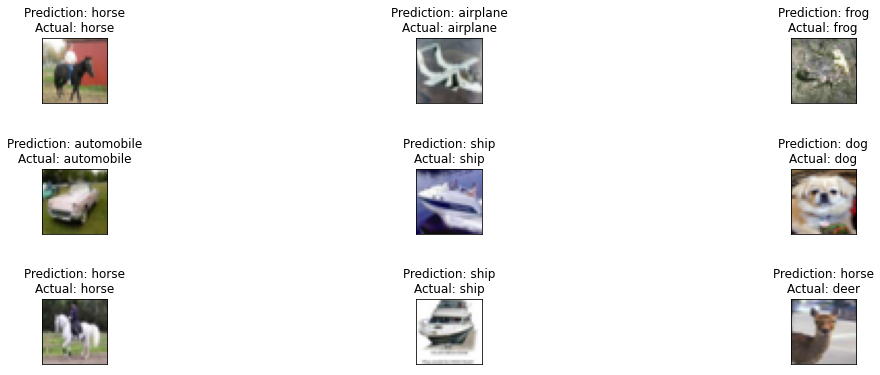

In [29]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()